# imports

In [1]:
# imports
import pandas as pd

import numpy as np
from sklearn.pipeline import Pipeline

from src.utils import utils
from src.data_processing import preprocessing as prep
import logging

%load_ext autoreload
%autoreload 2

# Read Data

In [2]:
root_dir = utils.get_proj_root()
raw_data =  pd.read_csv(root_dir.joinpath('data/raw/Stock_data.csv'))
raw_data.head()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,cashRatio,cashRatio_percentage_change,daysOfSalesOutstanding,...,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,priceFairValue,priceFairValue_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2012,Conglomerates,MMM,2.198387,-2.275946,1.385806,-0.090461,0.465000,14.018251,49.567449,...,-5.500411,8.692139,5.900833,3.571431,-2.168468,0.14,40.000000,2.36,7.272727,2.0
1,2013,Conglomerates,MMM,1.698186,-22.753086,1.012270,-26.954450,0.344225,-25.973091,50.284895,...,-28.717392,12.326051,41.806877,5.328531,49.198768,0.11,-21.428571,2.54,7.627119,2.0
2,2014,Conglomerates,MMM,1.961487,15.504836,1.127209,11.354593,0.316272,-8.120568,48.611609,...,14.836058,13.065263,5.997151,8.117223,52.335098,0.09,-18.181818,3.42,34.645669,2.0
3,2015,Conglomerates,MMM,1.543411,-21.314241,0.852768,-24.346986,0.252599,-20.132363,50.082909,...,30.819267,12.318266,-5.717433,8.022507,-1.166858,0.13,44.444444,4.10,19.883041,2.0
4,2016,Conglomerates,MMM,1.885512,22.165260,1.136839,33.311664,0.385593,52.650039,53.242552,...,-8.738086,13.479738,9.428861,10.440035,30.134325,0.40,207.692308,4.44,8.292683,2.0


In [3]:
raw_data.describe()

,year,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,cashRatio,cashRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,priceFairValue,priceFairValue_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
count,4790.000000,4790.000000,4.790000e+03,4790.000000,4.790000e+03,4790.000000,4.790000e+03,4790.000000,4790.000000,4790.000000,...,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.00000,4790.000000,4625.000000,4567.000000,4625.000000
mean,2016.500000,115.975409,1.203382e+04,47.013960,4.761163e+02,20.834161,5.842458e+02,82.152941,11.846910,19.926891,...,115.454267,16.115372,12.808659,4.049913,15.130181,0.63200,34.220437,1.507595,22.613096,1.414486
std,2.872581,4015.352605,6.211128e+05,1271.940109,1.905813e+04,670.792298,1.954470e+04,197.655285,187.975607,8663.814781,...,2637.442157,236.081319,1104.111410,62.434934,805.823460,0.73409,88.625633,2.486802,191.156100,0.877244
min,2012.000000,0.000000,-1.000000e+02,-1.480985,-6.944514e+02,0.000000,-1.000000e+02,-79.409628,-424.232944,-584907.567568,...,-100.000000,-8607.583336,-63039.175197,-1698.564205,-31192.181942,0.08000,-82.407407,0.000000,-100.000000,0.000000
25%,2014.000000,0.995836,-1.373288e+01,0.584890,-1.736940e+01,0.129800,-2.938055e+01,33.489167,-6.904695,3.152653,...,-14.721281,9.266166,-11.395042,1.761681,-10.050483,0.11000,-21.428571,0.260000,0.000000,0.000000
50%,2016.500000,1.449722,-9.821253e-01,0.997410,-1.349011e+00,0.341109,-6.881043e-01,53.137646,0.397062,40.316103,...,0.000000,12.954092,4.433934,3.163905,7.590405,0.26000,29.016393,1.080000,6.361323,2.000000
75%,2019.000000,2.331802,1.364322e+01,1.682155,1.709117e+01,0.757941,3.631823e+01,72.332846,8.991844,83.114873,...,14.658464,18.301095,22.565907,5.942402,25.866923,1.00000,83.000000,2.050000,14.641914,2.000000
max,2021.000000,207015.259574,4.246034e+07,63793.868085,1.257160e+06,33633.564748,1.257160e+06,5417.763945,11106.159855,68880.951016,...,136183.666595,10737.077141,31215.695305,1300.629474,44949.670649,2.16000,207.692308,104.480000,9900.000000,2.000000


# Initial Cleaning

In [4]:
raw_data.isna().sum()

year                                0
industry                            0
symbol                              0
currentRatio                        0
currentRatio_percentage_change      0
                                 ... 
interestRate                        0
interestRate_percentage_change      0
adjDividend                       165
dps_growth                        223
dps_change_next_year              165
Length: 116, dtype: int64

## steps
- remove rows with NA in label columns
- remove higly orrelated variables
- 

In [9]:
log_fmt = '%(asctime)s - %(levelname)s - %(name)s  - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)

label_col_name = 'dps_change_next_year'
collinear_thresh = 0.98
categorical_features = ['industry', 'symbol']

transform_pipeline = Pipeline([
    ('drop_rows_with_NA_in_label', prep.NARoWRemover(cols_to_check=label_col_name)),
    ('drop_collinear_columns', prep.CollinearColsRemover(thresh=collinear_thresh, label_col=label_col_name)),
    ('cat_to_ordinal_cols', prep.ColumnsOrdinalEncoder(col_names=categorical_features, convert_to_int=True)),
    ('binarize label column', prep.BinarizeCol(col_name=label_col_name, true_val=1))
])

transform_pipeline.fit(raw_data)
result = transform_pipeline.transform(raw_data)
# print(result.shape), print(raw_data.shape)
# result.head()

2023-10-27 18:04:15,778 - INFO - NARoWRemover  - dropped 165 rows with NA in columns: dps_change_next_year


2023-10-27 18:04:15,912 - INFO - CollinearColsRemover  - dropped 26 cols
2023-10-27 18:04:15,920 - INFO - NARoWRemover  - dropped 165 rows with NA in columns: dps_change_next_year
2023-10-27 18:04:15,922 - INFO - CollinearColsRemover  - dropped 26 cols
2023-10-27 18:04:15,930 - INFO - ColumnsOrdinalEncoder  - transformed categorical colums:['industry', 'symbol']
2023-10-27 18:04:15,932 - INFO - BinarizeCol  - bianrized dps_change_next_year


In [12]:
transform_pipeline

Pipeline(steps=[('drop_rows_with_NA_in_label',
                 NARoWRemover(cols_to_check='dps_change_next_year', how='all')),
                ('drop_collinear_columns',
                 CollinearColsRemover(label_col='dps_change_next_year',
                                      thresh=0.98)),
                ('cat_to_ordinal_cols',
                 ColumnsOrdinalEncoder(col_names=['industry', 'symbol'])),
                ('binarize label column',
                 BinarizeCol(col_name='dps_change_next_year', true_val=1))])

## data set imbalance

In [17]:
from imblearn.over_sampling import RandomOverSampler

RandomOverSampler()

,year,industry,symbol,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,daysOfInventoryOutstanding,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2012,Conglomerates,MMM,2.198387,-2.275946,1.385806,-0.090461,49.567449,3.987852,89.289449,...,6.939145,0.025377,-5.500411,8.692139,5.900833,0.14,40.000000,2.36,7.272727,2.0
1,2013,Conglomerates,MMM,1.698186,-22.753086,1.012270,-26.954450,50.284895,1.447414,87.567366,...,21.913077,0.018089,-28.717392,12.326051,41.806877,0.11,-21.428571,2.54,7.627119,2.0
2,2014,Conglomerates,MMM,1.961487,15.504836,1.127209,11.354593,48.611609,-3.327613,82.245394,...,-39.851336,0.020773,14.836058,13.065263,5.997151,0.09,-18.181818,3.42,34.645669,2.0
3,2015,Conglomerates,MMM,1.543411,-21.314241,0.852768,-24.346986,50.082909,3.026645,83.473315,...,799.567847,0.027175,30.819267,12.318266,-5.717433,0.13,44.444444,4.10,19.883041,2.0
4,2016,Conglomerates,MMM,1.885512,22.165260,1.136839,33.311664,53.242552,6.308824,82.149269,...,-84.149916,0.024801,-8.738086,13.479738,9.428861,0.40,207.692308,4.44,8.292683,2.0


## remove columns with NA in labels

In [200]:
# split data
training_data = raw_data[~(raw_data['year']==2021)]
test_data = raw_data[raw_data['year']==2021]
training_data.shape, test_data.shape

((4311, 116), (479, 116))

In [201]:
# X and y
y = training_data[label_col_name]
X = training_data.drop(labels=label_col_name, axis=1)

In [ ]:
# imbalance correction
# - oversampling, SMOTE

# Data Exploration

In [165]:
cov = np.cov(temp_df, rowvar=0)
w, v = np.linalg.eig(cov)
print(w)

[2.27914809e+19 4.04615997e+11 7.40401097e+10 1.23143814e+09
 7.85997180e+08 3.79869466e+08 2.55405475e+08 7.82014967e+07
 3.70466724e+07 2.71043122e+07 1.84617358e+07 1.89430309e+07
 1.12879460e+07 1.12314560e+07 1.09057729e+07 1.02010252e+07
 9.42366761e+06 4.63153147e+06 4.38270517e+06 2.69199037e+06
 2.49164361e+06 2.23168617e+06 2.12650714e+06 1.40942911e+06
 1.37411353e+06 1.28932307e+06 1.18822447e+06 9.78702002e+05
 8.36929193e+05 5.45182724e+05 5.26231192e+05 3.93400990e+05
 2.37591131e+05 1.44299839e+05 1.40228814e+05 1.29227599e+05
 1.30739058e+05 8.73439759e+04 8.69835230e+04 8.31895434e+04
 8.13617250e+04 6.20340403e+04 6.13203870e+04 4.42393935e+04
 4.00239395e+04 3.80990964e+04 3.57976669e+04 3.20480616e+04
 2.41121042e+04 2.57032146e+04 2.65017075e+04 1.22211398e+04
 7.95341362e+03 4.69089863e+03 4.35247228e+03 4.17393802e+03
 3.90167303e+03 1.62185183e+03 1.54716720e+03 1.03493536e+03
 7.48877337e+02 3.98197883e+02 2.11400362e+02 1.82428136e+02
 8.99510608e+01 6.328242

In [163]:
np.min(w), np.max(w), np.median(w), np.sum(w)

(0.0008338182144696295,
 2.2791480933771866e+19,
 44239.39346558913,
 2.2791481415342146e+19)

In [171]:
v[:, np.argmin(w)]

array([-7.61004381e-08,  1.16260797e-11,  5.08910700e-07, -2.26733643e-08,
        3.30517793e-06,  3.81013813e-05, -2.86448935e-08, -2.24424615e-06,
       -1.19744230e-06,  1.97605802e-14, -4.99516752e-03,  4.45305661e-05,
       -1.18621563e-01, -4.83394904e-07, -6.13623796e-02, -1.75637513e-07,
        2.50469942e-01, -8.70794637e-07, -2.25390898e-04,  1.00560400e-08,
       -8.65973137e-01,  1.35355128e-06,  5.25228599e-04, -2.08413095e-07,
        4.06074375e-01, -2.84300180e-05, -3.27917037e-07, -4.48863749e-06,
        4.91229998e-07,  3.30123886e-02,  2.07958129e-07, -1.54319620e-05,
       -2.89417859e-07,  5.34782109e-03,  2.73525586e-07, -4.85218915e-02,
        3.95714770e-06,  4.20439656e-07,  1.91622770e-06, -6.01009539e-08,
        7.47158896e-06, -9.54838283e-06, -5.85800083e-07, -6.47709612e-06,
        2.99862518e-06, -6.17049736e-07,  3.33532049e-07,  1.55675486e-08,
       -2.54981257e-08, -7.66777512e-03,  2.80330933e-05,  5.16873537e-04,
       -8.45351816e-07, -

In [150]:
temp_df.columns[9]

'daysOfPayablesOutstanding'

In [157]:
temp_df['daysOfPayablesOutstanding'].mean(), temp_df['daysOfPayablesOutstanding'].median(), \
temp_df['daysOfPayablesOutstanding'].max()

(70643446.76732217, 48.50593723348696, 322627794117.6471)

(array([4.562e+03, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.        ,  10350.76297872,  20701.52595745,  31052.28893617,
         41403.05191489,  51753.81489362,  62104.57787234,  72455.34085106,
         82806.10382979,  93156.86680851, 103507.62978723, 113858.39276596,
        124209.15574468, 134559.9187234 , 144910.68170213, 155261.44468085,
        165612.20765957, 175962.9706383 , 186313.73361702, 196664.49659574,
        207015.25957447]),
 <BarContainer object of 20 artists>)

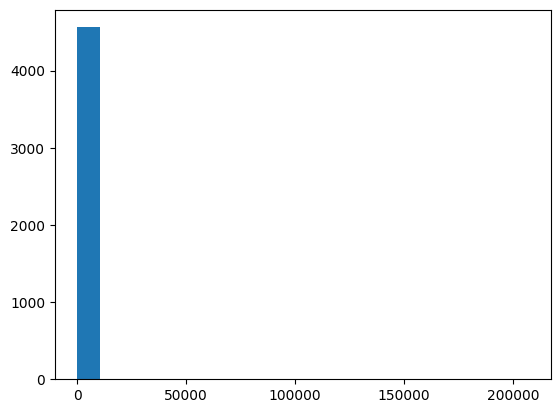

In [160]:
plt.hist(temp_df['currentRatio'], bins=20)

In [149]:
v[:, 0]

array([ 3.46133507e-10,  3.91569278e-08,  1.21986733e-10,  1.57323290e-09,
       -8.67303193e-11,  1.75726333e-11,  1.04577768e-11,  7.14049491e-11,
        2.19085329e-11, -1.00000000e+00, -1.57364748e-12, -2.00639708e-12,
        2.56414772e-13,  1.37058867e-10,  1.80157123e-13,  3.37540535e-10,
        1.34813134e-13,  1.25772619e-10, -7.85936333e-14, -5.36790664e-10,
        5.20732489e-14,  1.30985441e-11,  4.47503573e-14,  9.44764611e-10,
        1.98536824e-13,  1.98717938e-13,  1.03323948e-10,  1.76407162e-12,
        1.31492116e-11,  7.45479935e-13,  1.46872301e-09,  1.34795470e-12,
        1.45644164e-09,  8.12178665e-13,  4.01473237e-10,  8.55667520e-13,
        4.15744075e-11,  1.87177141e-10,  9.18351098e-11, -3.07332922e-12,
        3.08287742e-12,  3.76966850e-11,  5.16743843e-11,  2.79683902e-11,
        3.51866488e-10,  5.73292506e-11,  8.22151291e-11, -1.00107697e-10,
        8.90527037e-11,  1.07659164e-13,  5.98048868e-12, -1.84197430e-11,
        7.27350574e-11, -

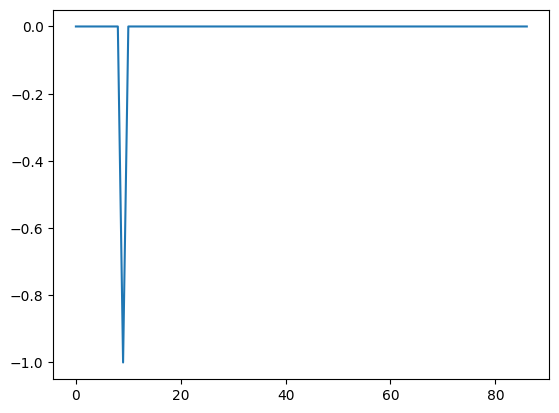

In [147]:
plt.plot(v[:, 0])

(array([86.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([8.33818214e-04, 1.13957405e+18, 2.27914809e+18, 3.41872214e+18,
        4.55829619e+18, 5.69787023e+18, 6.83744428e+18, 7.97701833e+18,
        9.11659237e+18, 1.02561664e+19, 1.13957405e+19, 1.25353145e+19,
        1.36748886e+19, 1.48144626e+19, 1.59540367e+19, 1.70936107e+19,
        1.82331847e+19, 1.93727588e+19, 2.05123328e+19, 2.16519069e+19,
        2.27914809e+19]),
 <BarContainer object of 20 artists>)

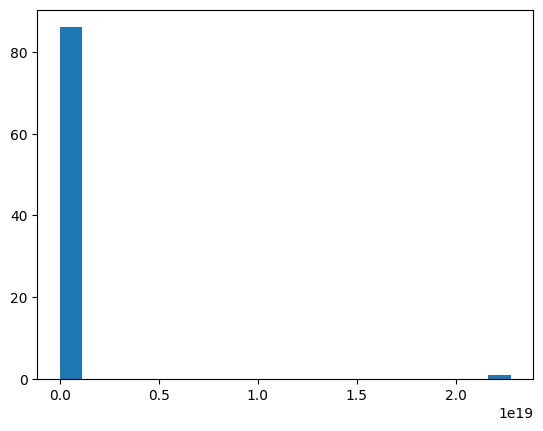

In [141]:
plt.hist(w, bins=20);

In [95]:
x1 = np.random.randn(100, 1)
x2 = np.random.randn(100, 1)

x3 = (x1 + x2)
x4 = np.random.randn(100, 1) 

xs = np.concatenate((x1, x2, x3, x4), axis=1)

# xs = scaler.fit_transform(xs)

# >>> corr = np.corrcoef(xs, rowvar=0)
cov = np.cov(xs, rowvar=0)
w, v = np.linalg.eig(cov)
print(w)



[ 2.95000720e+00 -2.58040117e-16  8.60020101e-01  1.07789338e+00]


In [96]:
v[:, 1]

array([-5.77350269e-01, -5.77350269e-01,  5.77350269e-01, -8.98710839e-17])